IMPORTING LIBRARIES

In [2]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score

In [3]:
#Loeading creditcard dataset
detection=pd.read_csv("../Task 5/creditcard.csv")


EXPLORING DATA

In [4]:
detection.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
detection.shape

(284807, 31)

In [6]:
#checking for null values
detection.isnull().sum() 


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#checking for duplicated values
detection.duplicated().sum()

1081

In [8]:
#dropping duplicated data values
detection.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
#checking the current shape of the dataset
detection.shape

(284807, 31)

In [13]:
#checking the number of legitimate and fraudulent cards
detection['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

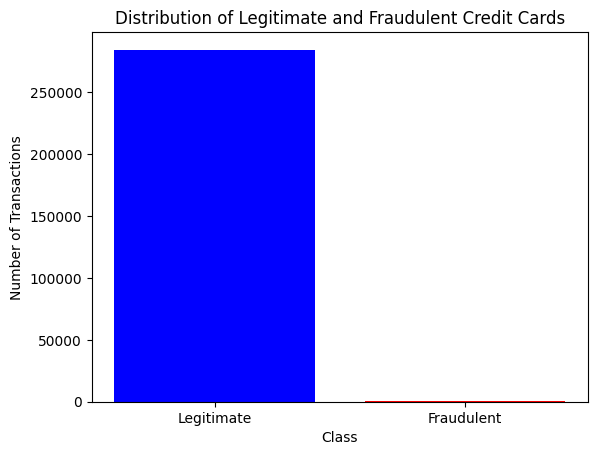

In [18]:
# Plotting of legitimate and fraudulent cards
class_counts = detection['Class'].value_counts()
plt.bar(['Legitimate', 'Fraudulent'], class_counts, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Legitimate and Fraudulent Credit Cards')
plt.show()

PREPROCESSING

In [20]:
X=detection.drop('Class', axis=1)
Y=detection['Class']

In [21]:
#Normalizing data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [22]:
#handling any imbalance in data 
oversampler=RandomOverSampler(sampling_strategy='minority')
X_resampled, Y_resampled=oversampler.fit_resample(X_scaled, Y)

In [23]:
#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=100)

In [24]:
#Training a Classification Algorithm
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [25]:
#Making predictions on the test data
Y_pred=model.predict(X_test)
Y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [26]:
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print("Precision:", precision)
print("F1-score:", f1)

Precision: 0.9773701968829949
F1-score: 0.9498585662036286



CONCLUSION

A precision score of 0.977 indicates that the model is good at not misclassifying genuine transactions as fraudulent. And an F1-score of 0.950 indicate that the model is performs well in classifying fraudulent credit card transactions.